# Intro to Data Science - Homework 5 - Fall 2024 - Wilmington College
## Due Date: April 26, 2024, 11:30 AM (Before the Start of Our Class)

Dear Students,

Welcome to Homework 5 for the Intro to Data Science course.

**Submission Instructions:**
Please complete the homework and commit your changes to GitHub. 

Last part of each problem dedicated to this question: "How long did it take you to solve this question? Was it easy, medium, or hard for you? Feel free to share any comments you have."

**Alternative Submission:**
If, for any reason, you are unable to use GitHub, you can submit your work via email.

Remember, timely completion of assignments is crucial for your understanding of the course material. If you face any challenges, don't hesitate to reach out.

## Exercise 1: Group Transformations
Consider a dataset containing information about students' exam scores across multiple subjects. The dataset is structured as follows:


    a. Write a function `normalize_scores` that takes a group as input and normalizes the scores within each subject to have a mean of 0 and a standard deviation of 1. Then, apply the `normalize_scores` function to the 'Score' column grouped by the 'Subject' column.
    b. Compute the ranks of students within each subject in ascending order using a custom function.

In [4]:
import pandas as pd
import numpy as np

data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Subject': ['Math', 'Math', 'Science', 'Science', 'English', 'English', 'Math', 'Science', 'English', 'Math'],
    'Score': [85, 90, 78, 82, 88, 92, 75, 80, 85, 88]
}

df = pd.DataFrame(data)
df

,Student_ID,Subject,Score
0,1,Math,85
1,2,Math,90
2,3,Science,78
3,4,Science,82
4,5,English,88
5,6,English,92
6,7,Math,75
7,8,Science,80
8,9,English,85
9,10,Math,88


In [5]:
#a. Write a function `normalize_scores` that takes a group as input and normalizes the scores within each subject to have a 
#mean of 0 and a standard deviation of 1. Then, apply the `normalize_scores` function to the 'Score' column grouped by the
#'Subject' column.
def normalize_scores(group):
     group['Normalized_Score'] = (group['Score'] - group['Score'].mean()) / group['Score'].std()
     return group

normalized_data = df.groupby('Subject').apply(normalize_scores)
normalized_data


/tmp/ipykernel_1112/1422287878.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normalized_data = df.groupby('Subject').apply(normalize_scores)


Student_ID  Subject  Score  Normalized_Score
Subject                                                
English 4           5  English     88         -0.094916
        5           6  English     92          1.044074
        8           9  English     85         -0.949158
Math    0           1     Math     85          0.075094
        1           2     Math     90          0.826033
        6           7     Math     75         -1.426785
        9          10     Math     88          0.525657
Science 2           3  Science     78         -1.000000
        3           4  Science     82          1.000000
        7           8  Science     80          0.000000

In [6]:
#b. Compute the ranks of students within each subject in ascending order using a custom function.
def compute_ranks(group):
    group['Rank'] = group['Score'].rank(method='min', ascending=True)
    return group

df.groupby('Subject').apply(compute_ranks)

/tmp/ipykernel_1112/1019078579.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Subject').apply(compute_ranks)


Student_ID  Subject  Score  Rank
Subject                                    
English 4           5  English     88   2.0
        5           6  English     92   3.0
        8           9  English     85   1.0
Math    0           1     Math     85   2.0
        1           2     Math     90   4.0
        6           7     Math     75   1.0
        9          10     Math     88   3.0
Science 2           3  Science     78   1.0
        3           4  Science     82   3.0
        7           8  Science     80   2.0

This question was a medium difficulty, it took me about 25 minutes to complete. 

## Exercise 2: Pivot Tables
Consider a sales dataset containing information about products, sales amounts, and sales regions. The dataset is structured as follows:

    a) Create a pivot table that shows the total sales amount for each product in each region.
    b) Calculate the average sales amount for each product across all regions.
    c) Extend the pivot table to include the sum of sales amounts for each region.
    d) Compute the median sales amount for each product within each region.

In [7]:
data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'East'],
    'Sales': [1000, 1200, 800, 900, 1100, 700, 950, 1250, 850]
}

df = pd.DataFrame(data)
df

,Product,Region,Sales
0,A,North,1000
1,B,North,1200
2,C,North,800
3,A,South,900
4,B,South,1100
5,C,South,700
6,A,East,950
7,B,East,1250
8,C,East,850


In [8]:
#a) Create a pivot table that shows the total sales amount for each product in each region.
pivot_table = df.pivot_table(index='Product', columns='Region', values='Sales', aggfunc='sum')
pivot_table

Region,East,North,South
Product,,,
A,950,1000,900
B,1250,1200,1100
C,850,800,700


In [9]:
#b) Calculate the average sales amount for each product across all regions.
pivot_table = df.pivot_table(index='Product', values='Sales', aggfunc='mean')
pivot_table

,Sales
Product,
A,950.000000
B,1183.333333
C,783.333333


In [10]:
#c) Extend the pivot table to include the sum of sales amounts for each region.
pivot_table = df.pivot_table(index='Product', columns='Region', values='Sales', aggfunc=['mean', 'sum'])
pivot_table

mean                   sum            
Region     East   North   South  East North South
Product                                          
A         950.0  1000.0   900.0   950  1000   900
B        1250.0  1200.0  1100.0  1250  1200  1100
C         850.0   800.0   700.0   850   800   700

In [11]:
#d) Compute the median sales amount for each product within each region.
pivot_table = df.pivot_table(index='Product', columns='Region', values='Sales', aggfunc='median')
pivot_table

Region,East,North,South
Product,,,
A,950.0,1000.0,900.0
B,1250.0,1200.0,1100.0
C,850.0,800.0,700.0


This question was a medium difficulty. It took me 25 minutes to complete. 

## Exercise 3: Cross-Tabulation
Consider a survey dataset containing information about participants' age groups, gender, and favorite leisure activities. The dataset is structured as follows:

    a) Create a cross-tabulation showing the count of participants by age group and gender.
    b) Compute the percentage of participants by age group and favorite leisure activity.
    c) Extend the cross-tabulation to include the sum of participants by gender.
    d) Calculate the ratio of male to female participants within each age group.

In [12]:
data = {
    'Age_Group': ['18-25', '26-35', '36-45', '18-25', '26-35', '36-45'],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Activity': ['Reading', 'Sports', 'Music', 'Sports', 'Music', 'Reading']
}

df = pd.DataFrame(data)
df

,Age_Group,Gender,Activity
0,18-25,Male,Reading
1,26-35,Male,Sports
2,36-45,Female,Music
3,18-25,Female,Sports
4,26-35,Male,Music
5,36-45,Female,Reading


In [13]:
#a) Create a cross-tabulation showing the count of participants by age group and gender.
pd.crosstab(df['Age_Group'], df['Gender'])

Gender,Female,Male
Age_Group,,
18-25,1,1
26-35,0,2
36-45,2,0


In [14]:
#b) Compute the percentage of participants by age group and favorite leisure activity.
cross_tab = pd.crosstab(df['Age_Group'], df['Activity'])

total_by_age_group = cross_tab.sum(axis=1)
percentages = cross_tab.div(total_by_age_group, axis=0) * 100
percentages

Activity,Music,Reading,Sports
Age_Group,,,
18-25,0.0,50.0,50.0
26-35,50.0,0.0,50.0
36-45,50.0,50.0,0.0


In [15]:
#c) Extend the cross-tabulation to include the sum of participants by gender.
pd.crosstab(df['Age_Group'], df['Gender'], margins=True, margins_name='Total')

Gender,Female,Male,Total
Age_Group,,,
18-25,1,1,2
26-35,0,2,2
36-45,2,0,2
Total,3,3,6


In [16]:
#d) Calculate the ratio of male to female participants within each age group.
cross_tab = pd.crosstab(df['Age_Group'], df['Gender'])

cross_tab['Male'] / cross_tab['Female']

Age_Group
18-25    1.0
26-35    inf
36-45    0.0
dtype: float64

This question was a medium difficulty, having to review crosstabs. It took me 20 minutes.

## Exercise 4:

Consider the following time series data representing the daily temperature readings (in degrees Celsius) for a particular location:

1. **Calculate the following statistics for the temperature data:**
      - a. Mean temperature for the year.
      - b. Standard deviation of the temperature readings.
      - c. Maximum temperature and the date on which it occurred.
      - d. Minimum temperature and the date on which it occurred.

2. **Find the number of days where the temperature was above the yearly average.**

3. **Resample the data to a monthly frequency and calculate the following statistics for each month:**
      - a. Mean temperature.
      - b. Standard deviation of temperature.
      - c. Maximum temperature and the date on which it occurred.
      - d. Minimum temperature and the date on which it occurred.

4. **Plot the original daily temperature data and the resampled monthly mean temperature data on the same graph. Ensure appropriate labeling of the axes and a legend for clarity.**

In [17]:
# Generating a date range for the index
dates = pd.date_range('2023-01-01', periods=365, freq='D')

# Generating random numerical data for the time series
data = np.random.randn(len(dates))

# Creating a pandas Series with the generated data and using dates as index
time_series = pd.Series(data, index=dates)
time_series


2023-01-01    1.260991
2023-01-02   -2.042228
2023-01-03    0.084279
2023-01-04   -0.123851
2023-01-05    0.177580
                ...   
2023-12-27    0.470015
2023-12-28   -0.756151
2023-12-29   -0.460292
2023-12-30   -0.507714
2023-12-31   -0.177404
Freq: D, Length: 365, dtype: float64

In [18]:
#a. Mean temperature for the year.
time_series.mean()

0.0685723027265169

In [19]:
#b. Standard deviation of the temperature readings.
time_series.std()

1.0223295140096942

In [20]:
#c. Maximum temperature and the date on which it occurred.
max_temperature = time_series.max()
max_date = time_series.idxmax()
print('The maximum temperature is', max_temperature,' and it occured on ', max_date)

The maximum temperature is 3.5473802524930775  and it occured on  2023-09-02 00:00:00


In [21]:
#d. Minimum temperature and the date on which it occurred.
min_temperature = time_series.min()
min_date = time_series.idxmin()
print('The minimum temperature is', min_temperature,' and it occured on ', min_date)

The minimum temperature is -3.7154912010059697  and it occured on  2023-09-03 00:00:00


In [22]:
#2.Find the number of days where the temperature was above the yearly average.
yearly_average = time_series.mean()
len(time_series[time_series > yearly_average])


187

In [23]:
#3. Resample the data to a monthly frequency and calculate the following statistics for each month
monthly= time_series.resample('M')

/tmp/ipykernel_1112/3050403515.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly= time_series.resample('M')


In [24]:
#a. Mean temperature.
monthly_mean = monthly.mean()
monthly_mean

2023-01-31    0.036725
2023-02-28    0.411893
2023-03-31    0.123561
2023-04-30   -0.384540
2023-05-31    0.259567
2023-06-30   -0.128731
2023-07-31    0.169749
2023-08-31    0.058067
2023-09-30   -0.285190
2023-10-31    0.351859
2023-11-30    0.183979
2023-12-31    0.030483
Freq: ME, dtype: float64

In [25]:
#b. Standard deviation of temperature.
monthly.std()

2023-01-31    1.244037
2023-02-28    1.012448
2023-03-31    0.942228
2023-04-30    1.062122
2023-05-31    0.820989
2023-06-30    1.112335
2023-07-31    0.859462
2023-08-31    0.919643
2023-09-30    1.265332
2023-10-31    0.870011
2023-11-30    0.914081
2023-12-31    1.017980
Freq: ME, dtype: float64

In [26]:
#c. Maximum temperature and the date on which it occurred.
monthly.max()


2023-01-31    1.906495
2023-02-28    2.403182
2023-03-31    2.030984
2023-04-30    1.498365
2023-05-31    1.924767
2023-06-30    1.748512
2023-07-31    1.437960
2023-08-31    1.624287
2023-09-30    3.547380
2023-10-31    2.383302
2023-11-30    1.831092
2023-12-31    2.147539
Freq: ME, dtype: float64

In [27]:
#d. Minimum temperature and the date on which it occurred.
monthly.min()

2023-01-31   -3.649985
2023-02-28   -1.239120
2023-03-31   -1.508071
2023-04-30   -2.475450
2023-05-31   -1.248426
2023-06-30   -2.430728
2023-07-31   -1.857008
2023-08-31   -2.190152
2023-09-30   -3.715491
2023-10-31   -1.095114
2023-11-30   -1.232538
2023-12-31   -2.715478
Freq: ME, dtype: float64

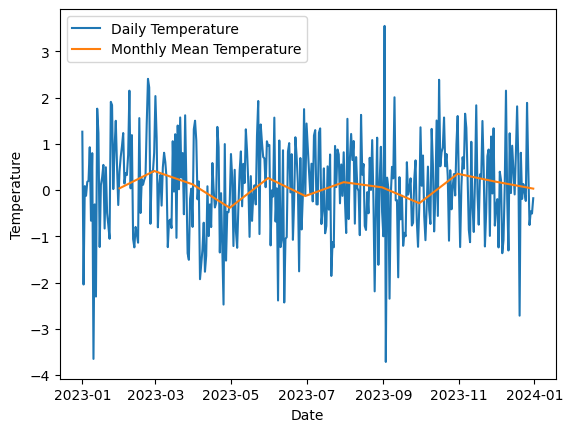

In [28]:
#4. Plot the original daily temperature data and the resampled monthly mean temperature data on the same graph. 
#Ensure appropriate labeling of the axes and a legend for clarity.
import matplotlib.pyplot as plt

plt.plot(time_series.index, time_series, label='Daily Temperature')

plt.plot(monthly_mean.index, monthly_mean, label='Monthly Mean Temperature')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

This question was an easier difficulty and it took about 15 minutes to complete

## Exercise 5:

Suppose you have a dataset containing the temperature readings in Celsius for a specific location over a period of time. The dataset is indexed by timestamps representing the date and time of each reading.

1. **Time Zone Conversion**: Convert the timestamps in the dataset from the local time zone ('America/New_York') to UTC.
2. **Temperature Shifting**: Shift the temperature data by 1 hour backward.
4. **Resampling**: Resample the dataset to represent daily average temperatures.
5. **Visualization**: Plot the original temperature data against the resampled data to visualize the changes.

In [29]:
# Create sample data
np.random.seed(0)
dates = pd.date_range('2024-01-01', periods=100, freq='H')
temperatures = np.random.randint(-10, 30, size=(100,))
temperature_data = pd.Series(temperatures, index=dates)
temperature_data

/tmp/ipykernel_1112/2446387701.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range('2024-01-01', periods=100, freq='H')


2024-01-01 00:00:00   -10
2024-01-01 01:00:00    -7
2024-01-01 02:00:00    -7
2024-01-01 03:00:00    29
2024-01-01 04:00:00    -1
                       ..
2024-01-04 23:00:00    -7
2024-01-05 00:00:00    24
2024-01-05 01:00:00     3
2024-01-05 02:00:00    29
2024-01-05 03:00:00    11
Freq: h, Length: 100, dtype: int64

In [30]:
#1. Time Zone Conversion**: Convert the timestamps in the dataset from the local time zone ('America/New_York') to UTC.
local= temperature_data.tz_localize('America/New_York')
local


2024-01-01 00:00:00-05:00   -10
2024-01-01 01:00:00-05:00    -7
2024-01-01 02:00:00-05:00    -7
2024-01-01 03:00:00-05:00    29
2024-01-01 04:00:00-05:00    -1
                             ..
2024-01-04 23:00:00-05:00    -7
2024-01-05 00:00:00-05:00    24
2024-01-05 01:00:00-05:00     3
2024-01-05 02:00:00-05:00    29
2024-01-05 03:00:00-05:00    11
Length: 100, dtype: int64

In [31]:
local.tz_convert('UTC')

2024-01-01 05:00:00+00:00   -10
2024-01-01 06:00:00+00:00    -7
2024-01-01 07:00:00+00:00    -7
2024-01-01 08:00:00+00:00    29
2024-01-01 09:00:00+00:00    -1
                             ..
2024-01-05 04:00:00+00:00    -7
2024-01-05 05:00:00+00:00    24
2024-01-05 06:00:00+00:00     3
2024-01-05 07:00:00+00:00    29
2024-01-05 08:00:00+00:00    11
Length: 100, dtype: int64

In [32]:
#2. Temperature Shifting**: Shift the temperature data by 1 hour backward.
temperature_data.shift(freq='-1h')


2023-12-31 23:00:00   -10
2024-01-01 00:00:00    -7
2024-01-01 01:00:00    -7
2024-01-01 02:00:00    29
2024-01-01 03:00:00    -1
                       ..
2024-01-04 22:00:00    -7
2024-01-04 23:00:00    24
2024-01-05 00:00:00     3
2024-01-05 01:00:00    29
2024-01-05 02:00:00    11
Freq: h, Length: 100, dtype: int64

In [33]:
#3. Resampling**: Resample the dataset to represent daily average temperatures.
daily_avg = temperature_data.resample('D').mean()

(array([19723. , 19723.5, 19724. , 19724.5, 19725. , 19725.5, 19726. ,
        19726.5, 19727. ]),
 [Text(19723.0, 0, '01-01 00'),
  Text(19723.5, 0, '01-01 12'),
  Text(19724.0, 0, '01-02 00'),
  Text(19724.5, 0, '01-02 12'),
  Text(19725.0, 0, '01-03 00'),
  Text(19725.5, 0, '01-03 12'),
  Text(19726.0, 0, '01-04 00'),
  Text(19726.5, 0, '01-04 12'),
  Text(19727.0, 0, '01-05 00')])

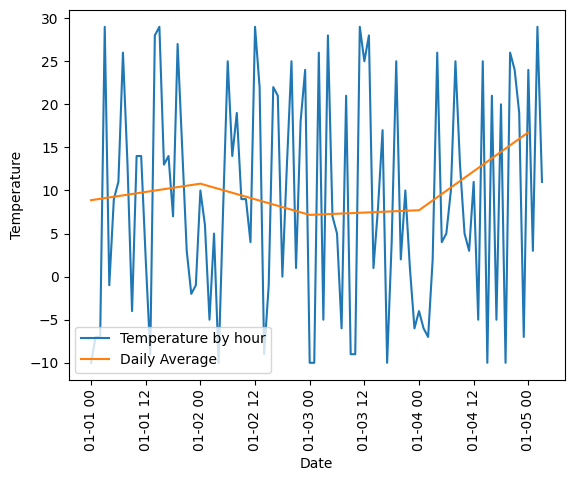

In [34]:
#4. Visualization**: Plot the original temperature data against the resampled data to visualize the changes.
plt.plot(temperature_data, label='Temperature by hour')

plt.plot(daily_avg, label='Daily Average')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=90)


This question was an easier difficulty it took about 15 minutes to complete.

## Exercise 6: Resampling and Moving Window Functions

Consider the following time series data representing the daily stock prices of three companies: Apple (AAPL), Microsoft (MSFT), and ExxonMobil (XOM).

1. **Resampling**
    - a. Resample the data to a monthly frequency, taking the mean of each month's values.
    - b. Resample the data to a quarterly frequency, taking the sum of each quarter's values.
    - c. Resample the data to a weekly frequency, using forward filling to fill missing values.

2. **Moving Window Functions**
    - a. Calculate the 30-day rolling average for each company's stock price.
    - b. Calculate the 60-day rolling standard deviation for each company's stock price.
    - c. Plot the 50-day exponentially weighted moving average (EWMA) for the Apple stock price alongside its actual price.


In [35]:
# Generate sample data
np.random.seed(0)
dates = pd.date_range("2022-01-01", periods=500)
stock_prices = pd.DataFrame(
    {
        "AAPL": np.random.normal(150, 10, 500),
        "MSFT": np.random.normal(100, 5, 500),
        "XOM": np.random.normal(50, 2, 500),
    },
    index=dates,
)
stock_prices.head()

,AAPL,MSFT,XOM
2022-01-01,167.640523,101.913662,51.111925
2022-01-02,154.001572,99.828789,51.784948
2022-01-03,159.787380,105.481734,49.155370
2022-01-04,172.408932,98.828921,50.209428
2022-01-05,168.675580,98.262747,50.456107


In [36]:
#a. Resample the data to a monthly frequency, taking the mean of each month's values.
monthly_mean = stock_prices.resample('M').mean()
monthly_mean


/tmp/ipykernel_1112/3381515792.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = stock_prices.resample('M').mean()


,AAPL,MSFT,XOM
2022-01-31,154.335691,98.953869,49.926940
2022-02-28,146.972192,99.188173,50.590579
2022-03-31,148.588913,98.729817,49.504702
2022-04-30,155.108334,98.634013,50.510185
2022-05-31,150.911578,100.436514,50.037935
2022-06-30,149.232252,98.300823,50.787391
2022-07-31,149.536256,100.511993,49.972422
2022-08-31,148.476571,98.799979,50.248071
2022-09-30,147.210386,99.950015,49.987890
2022-10-31,151.904889,99.154510,49.647069


In [37]:
#b. Resample the data to a quarterly frequency, taking the sum of each quarter's values.
quarterly_sum = stock_prices.resample('Q').sum()
quarterly_sum


/tmp/ipykernel_1112/1509241118.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sum = stock_prices.resample('Q').sum()


,AAPL,MSFT,XOM
2022-03-31,13505.884079,8905.463096,4498.917095
2022-06-30,13808.476499,9021.577012,4590.103249
2022-09-30,13654.709207,9177.171576,4606.471990
2022-12-31,13735.361822,9179.927296,4581.032617
2023-03-31,13424.741367,9011.096769,4507.499538
2023-06-30,6744.054829,4541.866812,2245.172521


In [38]:
#c. Resample the data to a weekly frequency, using forward filling to fill missing values.
weekly = stock_prices.resample('W').ffill()
weekly

,AAPL,MSFT,XOM
2022-01-02,154.001572,99.828789,51.784948
2022-01-09,148.967811,94.104210,49.901352
2022-01-16,153.336743,100.879095,48.185400
2022-01-23,158.644362,91.593909,49.165045
2022-01-30,164.693588,104.320262,48.962200
...,...,...,...
2023-04-23,141.175812,95.679775,50.347424
2023-04-30,158.625960,95.310599,51.375763
2023-05-07,146.500566,100.893964,48.519726
2023-05-14,139.819581,94.261945,47.841314


In [39]:
#a. Calculate the 30-day rolling average for each company's stock price.
stock_prices.rolling(window=30).mean()

,AAPL,MSFT,XOM
2022-01-01,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN
...,...,...,...
2023-05-11,150.673098,101.247090,50.234598
2023-05-12,150.773749,101.211985,50.214144
2023-05-13,150.866710,100.966140,50.145851
2023-05-14,151.290236,100.659800,50.076277


In [40]:
#b. Calculate the 60-day rolling standard deviation for each company's stock price.
stock_prices.rolling(window=60).std()

,AAPL,MSFT,XOM
2022-01-01,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN
...,...,...,...
2023-05-11,10.778496,4.337722,1.924630
2023-05-12,10.764948,4.266186,1.916500
2023-05-13,10.786289,4.170738,1.889833
2023-05-14,10.813670,4.215371,1.910845


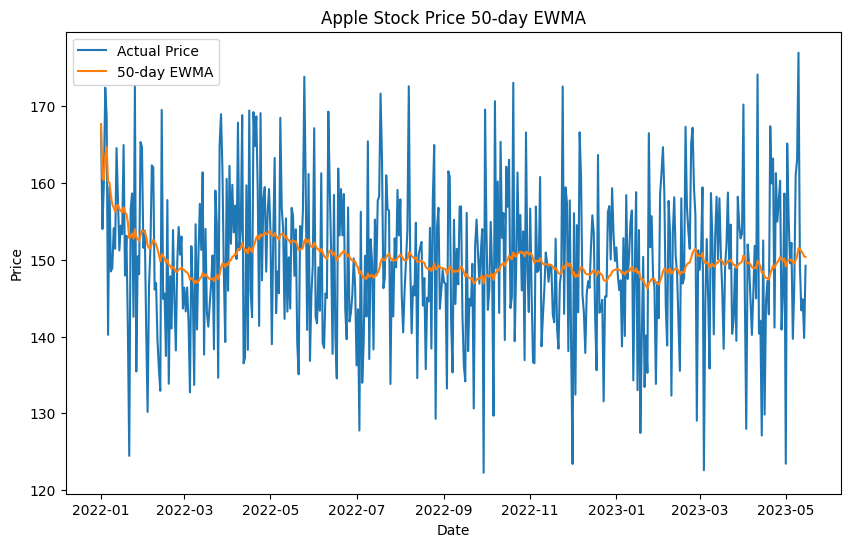

In [41]:
#c. Plot the 50-day exponentially weighted moving average (EWMA) for the Apple stock price alongside its actual price.
ewma = stock_prices["AAPL"].ewm(span=50).mean()

# Plot the actual price and the EWMA
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.index, stock_prices["AAPL"], label="Actual Price")
plt.plot(stock_prices.index, ewma, label="50-day EWMA")
plt.title("Apple Stock Price 50-day EWMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

This question was a medium dificulty it took me about 20 minutes after reviewing the notes.

## Exercise 7: Modeling with Patsy Formulas

Consider a dataset containing information about students' performance in various subjects. The dataset includes the following columns:

- `Math_Score`: The score obtained by the student in the Math exam.
- `Science_Score`: The score obtained by the student in the Science exam.
- `English_Score`: The score obtained by the student in the English exam.
- `Gender`: The gender of the student (Male or Female).
- `School_Type`: The type of school attended by the student (Public or Private).

Your task is to perform the following modeling tasks using Patsy formulas:

1. **Feature Engineering**:
    - a. Create a new feature called `Total_Score` by summing up the scores obtained by the student in all subjects.
    - b. Create dummy variables for the `Gender` column.
    - c. Create dummy variables for the `School_Type` column.

2. **Modeling**:
    - a. Using the Patsy formula syntax, create a linear model to predict the `Total_Score` based on the scores obtained in individual subjects (`Math_Score`, `Science_Score`, `English_Score`), gender (`Gender`), and school type (`School_Type`).
    - b. Fit the model to the dataset and extract the coefficients associated with each predictor variable.
    - c. Interpret the coefficients obtained from the model in terms of how they contribute to the predicted total score.

In [42]:
# Sample data
data = pd.DataFrame({
    'Math_Score': [85, 90, 78, 65, 95],
    'Science_Score': [75, 85, 80, 70, 90],
    'English_Score': [80, 70, 85, 75, 95],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'School_Type': ['Public', 'Private', 'Public', 'Public', 'Private']
})
data

,Math_Score,Science_Score,English_Score,Gender,School_Type
0,85,75,80,Male,Public
1,90,85,70,Female,Private
2,78,80,85,Male,Public
3,65,70,75,Female,Public
4,95,90,95,Male,Private


In [43]:
#a. Create a new feature called `Total_Score` by summing up the scores obtained by the student in all subjects.
data['Total_Score'] = data[['Math_Score', 'Science_Score', 'English_Score']].sum(axis=1)
data

,Math_Score,Science_Score,English_Score,Gender,School_Type,Total_Score
0,85,75,80,Male,Public,240
1,90,85,70,Female,Private,245
2,78,80,85,Male,Public,243
3,65,70,75,Female,Public,210
4,95,90,95,Male,Private,280


In [44]:
#b. Create dummy variables for the `Gender` column.
gender_dummies= pd.get_dummies(data.Gender, prefix='Gender', dtype=float)
data_gender_dummies = data.drop('Gender', axis=1).join(gender_dummies)
data_gender_dummies


,Math_Score,Science_Score,English_Score,School_Type,Total_Score,Gender_Female,Gender_Male
0,85,75,80,Public,240,0.0,1.0
1,90,85,70,Private,245,1.0,0.0
2,78,80,85,Public,243,0.0,1.0
3,65,70,75,Public,210,1.0,0.0
4,95,90,95,Private,280,0.0,1.0


In [45]:
#c. Create dummy variables for the `School_Type` column.
school_dummies= pd.get_dummies(data.School_Type, prefix='School_Type', dtype=float)
data_school_dummies = data.drop('School_Type', axis=1).join(school_dummies)
data_school_dummies


,Math_Score,Science_Score,English_Score,Gender,Total_Score,School_Type_Private,School_Type_Public
0,85,75,80,Male,240,0.0,1.0
1,90,85,70,Female,245,1.0,0.0
2,78,80,85,Male,243,0.0,1.0
3,65,70,75,Female,210,0.0,1.0
4,95,90,95,Male,280,1.0,0.0


In [46]:
!pip install statsmodels

In [47]:
#a. Using the Patsy formula syntax, create a linear model to predict the `Total_Score` based on the scores obtained in 
#individual subjects (`Math_Score`, `Science_Score`, `English_Score`), gender (`Gender`), and school type (`School_Type`).
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_formula = smf.ols('Total_Score ~ Math_Score + Science_Score + English_Score + Gender + School_Type', data=data).fit()
model_formula.predict(data[:5])

0    240.0
1    245.0
2    243.0
3    210.0
4    280.0
dtype: float64

In [50]:
#b. Fit the model to the dataset and extract the coefficients associated with each predictor variable.

coefficients = model_formula.params
coefficients


Intercept                0.011633
Gender[T.Male]           0.001588
School_Type[T.Public]   -0.001824
Math_Score               0.999941
Science_Score            0.999962
English_Score            0.999956
dtype: float64

In [ ]:
#c. Interpret the coefficients obtained from the model in terms of how they contribute to the predicted total score.

Based on these coefficients, it appears that the math score, science score, and English score have the strongest connections to the predicted total score, as their coefficients are close to 1. On the other hand, the gender and school type variables have relatively smaller connections, as their coefficients are closer to zero.

This question was a hard difficulty and it took me awhile to do because I could not figure out how to install Patsy and statsmodels. It took me about 30 minutes to complete. 